In [20]:
import numpy as np
import matplotlib.pyplot as plt


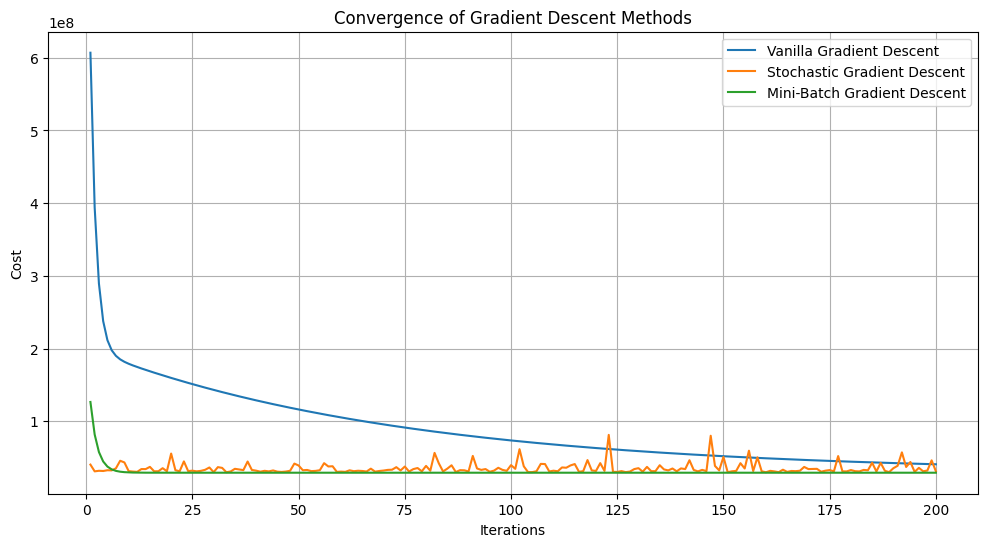

In [37]:

# Generate a sample dataset
np.random.seed(0)
#X = np.random.randn(1500, 15)
#y = X.dot(np.random.randn(15)) + np.random.normal(0, 1, size=(1500))
X = 2 * np.random.rand(1500,15)
y = 10 + 5*X.dot(np.random.randn(15))+ np.random.normal(0, 5, size=(1500))





def  cal_cost(theta,X,y):    
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def compute_gradient(X, y, weights):
    y_pred = X.dot(weights)
    gradient = -2/X.shape[0] * X.T.dot(y - y_pred)
    return gradient

def vanilla_gradient_descent(X, y, n_iterations, learning_rate):
    weights = np.random.randn(X.shape[1])
    cost_history = np.zeros(n_iterations)
    
    for iteration in range(n_iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient

        cost_history[iteration]  = cal_cost(weights,X,y)
        
    return cost_history

def stochastic_gradient_descent(X, y, n_iterations,learning_rate):
    weights = np.random.randn(X.shape[1])
    cost_history = np.zeros(n_iterations)
    for iteration in range(n_iterations):
        for i in range(X.shape[0]):
            random_index = np.random.randint(X.shape[0])
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = compute_gradient(xi, yi, weights)
            weights -= learning_rate * gradient

        cost_history[iteration]  = cal_cost(weights,X,y)
    return cost_history

def mini_batch_gradient_descent(X, y,n_iterations,learning_rate,batch_size=32):
    weights = np.random.randn(X.shape[1])
    cost_history = np.zeros(n_iterations)
    n_batches = int(X.shape[0] / batch_size)
    for iteration in range(n_iterations):
        for batch in range(n_batches):
            xi = X[batch*batch_size:(batch+1)*batch_size]
            yi = y[batch*batch_size:(batch+1)*batch_size]
            gradient = compute_gradient(xi, yi, weights)
            weights -= learning_rate * gradient

        cost_history[iteration]  = cal_cost(weights,X,y)
    return cost_history

# Different method
n_iterations=200
learning_rate=0.01
cost_history_vanilla = vanilla_gradient_descent(X, y,n_iterations,learning_rate)
cost_history_sgd = stochastic_gradient_descent(X, y,n_iterations,learning_rate)
cost_history_mini_batch = mini_batch_gradient_descent(X, y,n_iterations,learning_rate)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot([x for x in range(1,n_iterations+1)],cost_history_vanilla,label='Vanilla Gradient Descent')
plt.plot([x for x in range(1,n_iterations+1)],cost_history_sgd, label='Stochastic Gradient Descent')
plt.plot([x for x in range(1,n_iterations+1)],cost_history_mini_batch,label='Mini-Batch Gradient Descent')

plt.title('Convergence of Gradient Descent Methods')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()



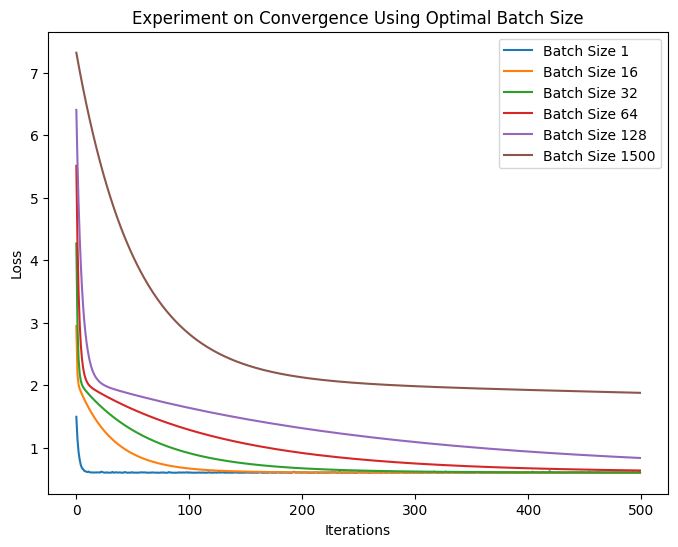

In [28]:

num_samples = 1500
X = np.random.rand(num_samples, 15)  # 15 features
true_weights = np.random.rand(16, 1)
y = 2*X.dot(true_weights[1:]) + true_weights[0] + np.random.normal(scale=0.8, size=(num_samples, 1))
# Add a column of ones for bias term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

def mini_batch_gradient_descent(X, y, initial_weights, learning_rate, num_iterations, batch_size):
    weights = initial_weights.copy()
    num_batches = int(num_samples / batch_size)
    loss_history = []

    for iteration in range(num_iterations):
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            Xi = X_shuffled[start_idx:end_idx]
            yi = y_shuffled[start_idx:end_idx]

            gradients = -2/batch_size * Xi.T.dot(yi - Xi.dot(weights))
            weights = weights -learning_rate * gradients
            
        # Compute the loss for the current iteration and append to history
        loss = np.mean((X.dot(weights) - y) ** 2)
        loss_history.append(loss)

    return weights, loss_history

batch_sizes = [1, 16, 32,64,128,num_samples]
initial_weights = np.random.randn(16, 1)
# Plotting
plt.figure(figsize=(8, 6))

for batch_size in batch_sizes:
    _, loss_history = mini_batch_gradient_descent(X_bias, y, initial_weights, 0.001, 500, batch_size)
    plt.plot(loss_history, label=f"Batch Size {batch_size}")
   
plt.title('Convergence Using Optimal Batch Size')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()